1. importar librerias y cargar el archivo:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## parte 1

In [55]:

# Cargar el archivo CSV (asegúrate de reemplazar 'tu_archivo.csv' con la ruta real)
df = pd.read_csv(r"C:\Users\franb\Downloads\proyectos_data\FAO\copias\Production_Crops_Livestock_E_All_Data_(Normalized)\Production_Crops_Livestock_E_All_Data_(Normalized).csv")

C:\Users\franb\AppData\Local\Temp\ipykernel_12212\3360930396.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\franb\Downloads\proyectos_data\FAO\copias\Production_Crops_Livestock_E_All_Data_(Normalized)\Production_Crops_Livestock_E_All_Data_(Normalized).csv")


2. analizamos que contiene el archivo para ir familiarizandonos con sus datos y estructura:

In [56]:
# conteo de filas y columnas
np.shape(df)

(4211720, 14)

obs: podemos ver que es un archivo que contiene muchos registros. +4M

In [57]:
df.head(5)

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1961,1961,ha,0.0,A,NaN
1,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1962,1962,ha,0.0,A,NaN
2,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1963,1963,ha,0.0,A,NaN
3,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1964,1964,ha,0.0,A,NaN
4,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5312,Area harvested,1965,1965,ha,0.0,A,NaN


obs: notmos que hay columnas que no nos van a sevir para nuestro 1er analisis. hay que eliminarlas y que hay valores faltantes.

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4211720 entries, 0 to 4211719
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Area Code        int64  
 1   Area Code (M49)  object 
 2   Area             object 
 3   Item Code        int64  
 4   Item Code (CPC)  object 
 5   Item             object 
 6   Element Code     int64  
 7   Element          object 
 8   Year Code        int64  
 9   Year             int64  
 10  Unit             object 
 11  Value            float64
 12  Flag             object 
 13  Note             object 
dtypes: float64(1), int64(5), object(8)
memory usage: 449.9+ MB


obs: los tipos de datos de las columnas son conrrectos. no hay que aplicarle cambios, ni normalizar pareciera.

3. comenzamos con la limpieza del dataframe:

In [60]:
#eliminamos columnas innecesarias:
df_clean_columns = df.drop(["Area Code", "Area Code (M49)", "Item Code", "Item Code (CPC)", "Element Code", "Year Code", "Note"], axis=1)

In [61]:
#comprobamos que se han eliminado esas columnas que no queremos:
df_clean_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4211720 entries, 0 to 4211719
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Area     object 
 1   Item     object 
 2   Element  object 
 3   Year     int64  
 4   Unit     object 
 5   Value    float64
 6   Flag     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 224.9+ MB


In [62]:
#printeamos con un .head para verlo mejor a la estructura del nuevo dataframe:
df_clean_columns.head(5)

,Area,Item,Element,Year,Unit,Value,Flag
0,Afghanistan,"Almonds, in shell",Area harvested,1961,ha,0.0,A
1,Afghanistan,"Almonds, in shell",Area harvested,1962,ha,0.0,A
2,Afghanistan,"Almonds, in shell",Area harvested,1963,ha,0.0,A
3,Afghanistan,"Almonds, in shell",Area harvested,1964,ha,0.0,A
4,Afghanistan,"Almonds, in shell",Area harvested,1965,ha,0.0,A


In [63]:
# guardamos las modificaciones en un nuevo archivo, para seguir trabajando desde acá:
df_clean_columns.to_csv("datos_limpiados.csv", index=False)


In [64]:
# la ultima columna (flag) tiene referencias de otra tabla que no está en este dataframe, por lo que reemplazamos los valores 
# para que se comprendan mejor:
df_clean_columns['Flag'] = df_clean_columns['Flag'].replace({
    "E": "Estimated value",
    "I": "Imputed value",
    "A": "Official figure",
    "M": "Missing value (data cannot exist; not applicable)",
    "X": "Figure from international organizations"
})
df_clean_columns.head()

,Area,Item,Element,Year,Unit,Value,Flag
0,Afghanistan,"Almonds, in shell",Area harvested,1961,ha,0.0,Official figure
1,Afghanistan,"Almonds, in shell",Area harvested,1962,ha,0.0,Official figure
2,Afghanistan,"Almonds, in shell",Area harvested,1963,ha,0.0,Official figure
3,Afghanistan,"Almonds, in shell",Area harvested,1964,ha,0.0,Official figure
4,Afghanistan,"Almonds, in shell",Area harvested,1965,ha,0.0,Official figure


obs: podemos ver que ya quedaron reemplazadas y que ademas pareciera haber valores nulos en columna value, que lo vamos a dejar para mas adelante.

In [65]:
#printeamos un listado con los valores de la culumna Area, para ver si solo incluye paises:

pd.set_option("display.max_rows", None)  # Muestra todas las filas, sin truncar
df_clean_columns["Area"].value_counts() # me enlista las categorias dentro de la columna "area"

Area
World                                                   44964
Asia                                                    41816
Net Food Importing Developing Countries                 41420
Americas                                                39541
Africa                                                  39468
Low Income Food Deficit Countries                       39076
Land Locked Developing Countries                        37825
Least Developed Countries                               36541
South America                                           36247
Eastern Asia                                            36144
Europe                                                  35794
European Union (27)                                     34983
China                                                   34698
Western Asia                                            34456
Southern Europe                                         34118
China, mainland                                         34015
Sou

obs: notamos que ademas de paises, hay categorias por zonas geograficas, por lo que para nuestro analisis a nivel paises, debemos quitar los registros correspondientes a zonas/areas para que quede solo informacion a nivel paises, individualmente.

In [66]:
#printeamos una lista de nuevo,para verlas mejor, ya que la anterior me la trunca:

pd.set_option("display.max_rows", None)  # Muestra todas las filas
df_clean_columns["Area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
      

obs: vamos a proceder a quitar del dataframe las areas que no nos interesan.

In [67]:
# Lista de valores que NO son países
no_paises = [
    "World", "Africa", "Americas", "Asia", "Europe", "Oceania",
    "Eastern Africa", "Middle Africa", "Northern Africa", "Southern Africa", "Western Africa",
    "Northern America", "Central America", "Caribbean", "South America",
    "Central Asia", "Eastern Asia", "Southern Asia", "South-eastern Asia", "Western Asia",
    "Eastern Europe", "Northern Europe", "Southern Europe", "Western Europe",
    "Australia and New Zealand", "Melanesia", "Micronesia", "Polynesia",
    "European Union (27)", "Least Developed Countries", "Land Locked Developing Countries",
    "Small Island Developing States", "Low Income Food Deficit Countries",
    "Net Food Importing Developing Countries", "Belgium-Luxembourg",
    "Czechoslovakia", "Ethiopia PDR", "Serbia and Montenegro", "Sudan (former)",
    "USSR", "Yugoslav SFR" , "China"
]

# Filtrar solo países actuales (NO por categorias de paises)
df_paises = df_clean_columns[~df_clean_columns["Area"].isin(no_paises)]


In [68]:
# conteo de filas y columnas
np.shape(df_paises)

(3063690, 7)

obs: podemos ver que el dataframe se redujo a 3M de regstros, al quitar aquellos que NO son paises.(exluimos a china, ya que queda representada como china mainland)

In [109]:
# Filtrar solo los datos de producción (Element = "Production")
df_production = df_paises[df_paises["Element"] == "Production"]
np.shape(df_production)

(1199364, 7)

In [69]:
# guardamos las modificaciones en un nuevo archivo, para seguir trabajando desde acá:
df_paises.to_csv("datos_limpiados_paises.csv", index=False)

obs: como nos interesa para responder una de las preguntas, la produccion de cada pais, es que tuvimos que filtrar la columna Element. Notar que el dataframe se redujo considerablemente a aprox 1M de registros ahora.

In [110]:
#chequear que ya no esten las areas que no son paises:
df_production["Area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
    

In [111]:
# guardamos las modificaciones en un nuevo archivo, para seguir trabajando desde acá:
df_production.to_csv("datos_limpiados_countryonly.csv", index=False)

## parte 2: trabajamos desde el dataframe mas limpio (columnas quitadas, solo paises y solo lo que producen) falta. filtrar 2023 y categoria alimentos

In [2]:
# Cargar el archivo CSV:
df_production2 = pd.read_csv(r"C:\Users\franb\Downloads\proyectos_data\FAO\datos_limpiados_countryonly.csv")

In [3]:
#anteriormente habiamos notado valores nulos. vamos a ver cuantos hay en cada columna:

print(df_production2.isnull().sum()) #cuantos nulos tengo, en cada columna??


Area           0
Item           0
Element        0
Year           0
Unit           0
Value      77721
Flag           0
dtype: int64


obs: solo tenemos nulos en la columna value

In [4]:
#calculamos el impacto de estos nulos, midiendo el porcentaje en relacion al total de registros:
porcentaje_nulos = (df_production2.isnull().sum() / len(df_production2)) * 100
print(porcentaje_nulos)

Area       0.000000
Item       0.000000
Element    0.000000
Year       0.000000
Unit       0.000000
Value      6.480184
Flag       0.000000
dtype: float64


obs. podemos ver que solo hay un 6% de valores nulos, lo que significa un numero bajo para el dataframe que estamos manejando. por lo que se podrían dejar sin darles un tratamiento.

In [5]:
# Filtrar y mostrar solo las filas duplicadas
df_duplicados = df_production2[df_production2.duplicated()]
print(df_duplicados)


Empty DataFrame
Columns: [Area, Item, Element, Year, Unit, Value, Flag]
Index: []


In [6]:
print(df_production2.duplicated().sum())


0


obs: podemos notar que el cojunto de datos no contiene valores duplicados.

## evaluacion de nulos: los valores nulos estan en todos los paises o solo en algunos? estan en alimentos especificos o en todos? en años particulares o todos?

In [8]:

# Calcular el porcentaje de valores nulos por país
null_by_country = df_production2.groupby("Area")["Value"].apply(lambda x: x.isnull().mean() * 100).reset_index()
null_by_country.columns = ["Area", "Percentage_Null_Values"]

# Mostrar los países más afectados
print(null_by_country.sort_values(by="Percentage_Null_Values", ascending=False))

                 Area  Percentage_Null_Values
138         Palestine               49.865101
170       South Sudan               44.408163
10            Bahamas               21.218433
18             Bhutan               18.083152
126             Nepal               17.716430
..                ...                     ...
103           Liberia                0.000000
125             Nauru                0.000000
113  Marshall Islands                0.000000
87               Iraq                0.000000
187            Tuvalu                0.000000

[203 rows x 2 columns]


obs: podemos notar que no todos los paises tienen valores nulos y que palestina tiene casi el 50% de estos valores faltantes.

In [10]:

# Calcular el porcentaje de valores nulos por año
null_by_year = df_production2.groupby("Year")["Value"].apply(lambda x: x.isnull().mean() * 100).reset_index()
null_by_year.columns = ["Year", "Percentage_Null_Values"]

# Mostrar los años más afectados
print(null_by_year.sort_values(by="Percentage_Null_Values", ascending=False))


    Year  Percentage_Null_Values
0   1961                8.401272
13  1974                8.371420
12  1973                8.365635
16  1977                8.359850
15  1976                8.359850
..   ...                     ...
58  2019                3.540956
62  2023                3.374585
59  2020                3.371586
60  2021                3.117461
61  2022                2.981825

[63 rows x 2 columns]


obs: ademas, vemos que esos valores nulos se han ido reduciendo con los años, quizas por mejoras en la captacion de los datos. teniendo aporx solo un 3% de nulos en el año 2023 que es el que vamos a evaluar.

para evaluar a palestina que es el pais con mayor cantidad de nulos, analizamos el comportamiento de estos a lo largo de los años:

In [12]:

# Filtrar solo los datos de producción de alimentos
df_production_p = df_production2[df_production2["Element"] == "Production"]

# Filtrar solo los datos de producción de alimentos para Palestina
df_palestine_production = df_production2[df_production2["Area"] == "Palestine"]

# Calcular el porcentaje de valores nulos por año en Palestina
null_by_year_palestine = df_palestine_production.groupby("Year")["Value"].apply(lambda x: x.isnull().mean() * 100).reset_index()
null_by_year_palestine.columns = ["Year", "Percentage_Null_Values"]

# Mostrar los años más afectados en Palestina
print("Porcentaje de valores nulos por año en Palestina:")
print(null_by_year_palestine.sort_values(by="Year", ascending=False))


Porcentaje de valores nulos por año en Palestina:
    Year  Percentage_Null_Values
62  2023                3.809524
61  2022                3.603604
60  2021                3.603604
59  2020                3.669725
58  2019                3.669725
..   ...                     ...
4   1965               98.913043
3   1964               98.913043
2   1963               98.913043
1   1962               98.913043
0   1961               98.913043

[63 rows x 2 columns]


obs. podemos ver que palestina se comporta como lo anterior mencionado, ya que se encuentral la mayor cantidad de nulos en los primeros años y a medida que van pasando, se reduce drasticamente la cantidad de nulos o  faltantes.

In [55]:
# Filtrar solo los datos de producción de alimentos para Palestina
df_palestine_production = df_production[(df_production["Element"] == "Production") & (df_production["Area"] == "Palestine")]

# Calcular estadísticas descriptivas de la columna "Value"
palestine_value_stats = {
    "Promedio": df_palestine_production["Value"].mean(),
    "Mínimo": df_palestine_production["Value"].min(),
    "Máximo": df_palestine_production["Value"].max()
}

palestine_value_stats

{'Promedio': np.float64(29416.10968027857),
 'Mínimo': np.float64(0.0),
 'Máximo': np.float64(810000.0)}

In [13]:
# Calcular el porcentaje de valores nulos por categoría de alimento (Item)
null_by_item = df_production2.groupby("Item")["Value"].apply(lambda x: x.isnull().mean() * 100).reset_index()
null_by_item.columns = ["Item", "Percentage_Null_Values"]

# Mostrar las categorías más afectadas
print(null_by_item.sort_values(by="Percentage_Null_Values", ascending=False))


                              Item  Percentage_Null_Values
28             Butter of goat milk              100.000000
36                  Cassava leaves               99.375000
18                     Blueberries               39.525463
67                     Cranberries               39.082058
19           Brazil nuts, in shell               38.083538
..                             ...                     ...
236    Skim Milk & Buttermilk, Dry                0.000000
25   Butter and ghee of sheep milk                0.000000
24                 Butter and Ghee                0.000000
256               Tallowtree seeds                0.000000
249            Sugar Crops Primary                0.000000

[281 rows x 2 columns]


obs: podemos ver que hay alimentos que no tienen nulos y otros que tienen muchos, y hay 2 con valores muy altos de nulos(butter of goat milk y cassava leaves)

In [14]:
# Contar cuántos países tienen al menos un valor nulo
countries_with_nulls = df_production2[df_production2["Value"].isnull()]["Area"].nunique()
total_countries = df_production2["Area"].nunique()

# Mostrar el número de países afectados
print(f"Países afectados: {countries_with_nulls} de {total_countries}")


Países afectados: 197 de 203


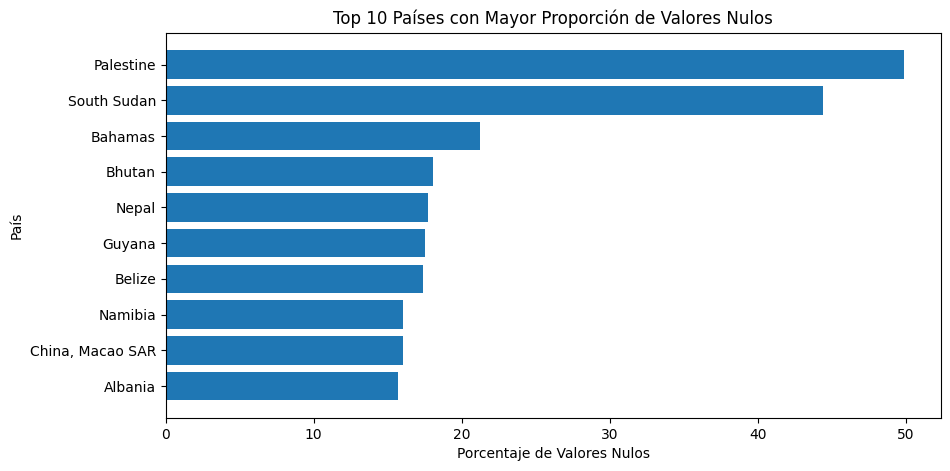

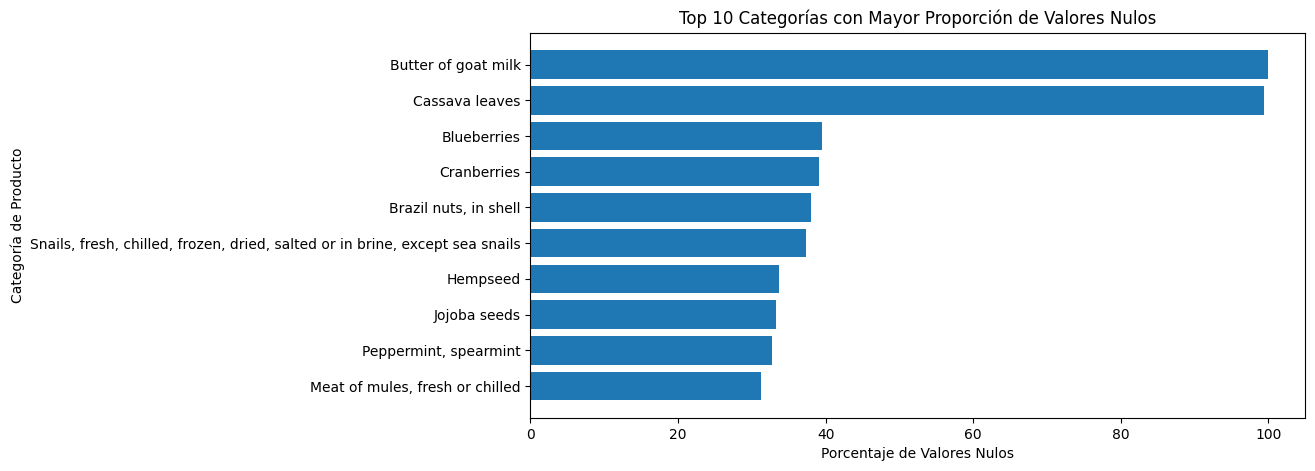

In [15]:

# Gráfica de países más afectados
top_countries_null = null_by_country.sort_values(by="Percentage_Null_Values", ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.barh(top_countries_null["Area"], top_countries_null["Percentage_Null_Values"])
plt.xlabel("Porcentaje de Valores Nulos")
plt.ylabel("País")
plt.title("Top 10 Países con Mayor Proporción de Valores Nulos")
plt.gca().invert_yaxis()  # Invierte el eje para mejor visualización
plt.show()

# Gráfica de categorías más afectadas
top_items_null = null_by_item.sort_values(by="Percentage_Null_Values", ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.barh(top_items_null["Item"], top_items_null["Percentage_Null_Values"])
plt.xlabel("Porcentaje de Valores Nulos")
plt.ylabel("Categoría de Producto")
plt.title("Top 10 Categorías con Mayor Proporción de Valores Nulos")
plt.gca().invert_yaxis()
plt.show()


## aplicar filtros de año 2023, quitar categorias de alimentos y unidades de produccion no validas:

In [26]:
df_production2.head(5)

,Area,Item,Element,Year,Unit,Value,Flag
0,Afghanistan,"Almonds, in shell",Production,1961,t,0.0,Official figure
1,Afghanistan,"Almonds, in shell",Production,1962,t,0.0,Official figure
2,Afghanistan,"Almonds, in shell",Production,1963,t,0.0,Official figure
3,Afghanistan,"Almonds, in shell",Production,1964,t,0.0,Official figure
4,Afghanistan,"Almonds, in shell",Production,1965,t,0.0,Official figure


In [34]:
# Ver los valores únicos en la columna "Unit"
unidades_unicas = df_production2["Unit"].unique()

# Mostrar resultados
print("Unidades de medida en el dataframe:")
print(unidades_unicas)


Unidades de medida en el dataframe:
['t' '1000 No']


obs: vemos que la columna unit posee una unidad que no nos sirve en nuestro analisis. la eliminaremos

In [36]:
#eliminar del dataframe los registros que tengan como Unit = 1000 no (para normalizar las unidades al comparar):

# Filtrar el dataframe eliminando los registros donde "Unit" es "1000 No"
df_filtrado = df_production2[df_production2["Unit"] != "1000 No"]

# Mostrar las primeras filas para verificar
df_filtrado.head()

# Opcional: Guardar el dataframe filtrado en un nuevo archivo CSV
df_filtrado.to_csv("datos_filtrados_3.csv", index=False)


In [29]:
df_filtrado

,Area,Item,Element,Year,Unit,Value,Flag
0,Afghanistan,"Almonds, in shell",Production,1961,t,0.00,Official figure
1,Afghanistan,"Almonds, in shell",Production,1962,t,0.00,Official figure
2,Afghanistan,"Almonds, in shell",Production,1963,t,0.00,Official figure
3,Afghanistan,"Almonds, in shell",Production,1964,t,0.00,Official figure
4,Afghanistan,"Almonds, in shell",Production,1965,t,0.00,Official figure
...,...,...,...,...,...,...,...
1199359,Zimbabwe,Vegetables Primary,Production,2019,t,1778903.05,Estimated value
1199360,Zimbabwe,Vegetables Primary,Production,2020,t,2671142.52,Estimated value
1199361,Zimbabwe,Vegetables Primary,Production,2021,t,2008796.79,Estimated value
1199362,Zimbabwe,Vegetables Primary,Production,2022,t,1855383.25,Estimated value


In [39]:
# Filtrar el dataframe para año 2023:
df_filtrado_2023 = df_filtrado[df_filtrado["Year"] == 2023]

# Mostrar las primeras filas para verificar
df_filtrado_2023.head(5)



,Area,Item,Element,Year,Unit,Value,Flag
62,Afghanistan,"Almonds, in shell",Production,2023,t,67000.00,Official figure
125,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Production,2023,t,17908.59,Estimated value
188,Afghanistan,Apples,Production,2023,t,324000.00,Official figure
251,Afghanistan,Apricots,Production,2023,t,155429.38,Imputed value
314,Afghanistan,Barley,Production,2023,t,110000.00,Figure from international organizations


In [40]:
# Opcional: Guardar el dataframe filtrado en un nuevo archivo CSV
df_filtrado_2023.to_csv("datos_filtrados_year2023.csv", index=False)

siguiente paso: luego de filtrar por año 2023 y eliminar del df registros que no nos servian (medida de cantidad de huevos en miles), vamos a proceder a realizar la exclusion de las categorias de alimentos que no nos sirven para nuestra analisis ya que solo queremos comparar alimentos, no categorias de ellos.

In [41]:
# Lista de categorías a excluir
categorias_a_excluir = [
    "Cereals, primary", "Cereals n.e.c.", "Beef and Buffalo Meat, primary", "Meat, Poultry", "Sheep and Goat Meat", "Skim Milk & Buttermilk, Dry",
    "Whole milk powder", "Whole milk, condensed", "Whole milk, evaporated", "Evaporated & Condensed Milk",
    "Oilcrops, Cake Equivalent", "Oilcrops, Oil Equivalent", "Sugar Crops Primary",
    "Other sugar crops n.e.c.", "Raw milk of cattle",
    "Edible roots and tubers with high starch or inulin content, n.e.c., fresh",
    "Fruit Primary", "Vegetables Primary", "Citrus Fruit, Total", "Other fruits, n.e.c.",
    "Other vegetables, fresh n.e.c.", "Other pulses n.e.c.", "Treenuts, Total",
    "Fibre Crops, Fibre Equivalent", "Other oil seeds, n.e.c.", "Other stimulant, spice and aromatic crops, n.e.c.",
      "Meat of pig with the bone, fresh or chilled", "Roots and Tubers, Total", "Skim milk of cows",
]

# Filtrar el dataframe eliminando las categorías generales
df_filtrado_2023_cat = df_filtrado_2023[df_filtrado_2023["Item"].isin(categorias_a_excluir) == False]



In [45]:
#Guardar el dataframe filtrado en un nuevo archivo CSV
df_filtrado_2023_cat.to_csv("datos_filtrados_year2023_cat.csv", index=False)

In [46]:
# conteo de filas y columnas
np.shape(df_filtrado_2023_cat)

(13924, 7)

In [47]:
#chequear que ya no esten las areas que no son categorias:
df_filtrado_2023_cat["Item"].unique()

array(['Almonds, in shell',
       'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
       'Apples', 'Apricots', 'Barley', 'Cantaloupes and other melons',
       'Cattle fat, unrendered',
       'Edible offal of cattle, fresh, chilled or frozen',
       'Edible offal of goat, fresh, chilled or frozen',
       'Edible offal of sheep, fresh, chilled or frozen',
       'Edible offals of camels and other camelids, fresh, chilled or frozen',
       'Fat of camels', 'Figs', 'Game meat, fresh, chilled or frozen',
       'Goat fat, unrendered', 'Grapes', 'Hen eggs in shell, fresh',
       'Linseed', 'Maize (corn)', 'Meat of camels, fresh or chilled',
       'Meat of cattle with the bone, fresh or chilled',
       'Meat of chickens, fresh or chilled',
       'Meat of goat, fresh or chilled',
       'Meat of sheep, fresh or chilled', 'Millet', 'Mustard seed',
       'Natural honey', 'Olives',
       'Onions and shallots, dry (excluding dehydrated)', 'Oranges',
       

## respuesta a la 1er pregunta: cual es el alimento mayormente producido a nivel munidal?

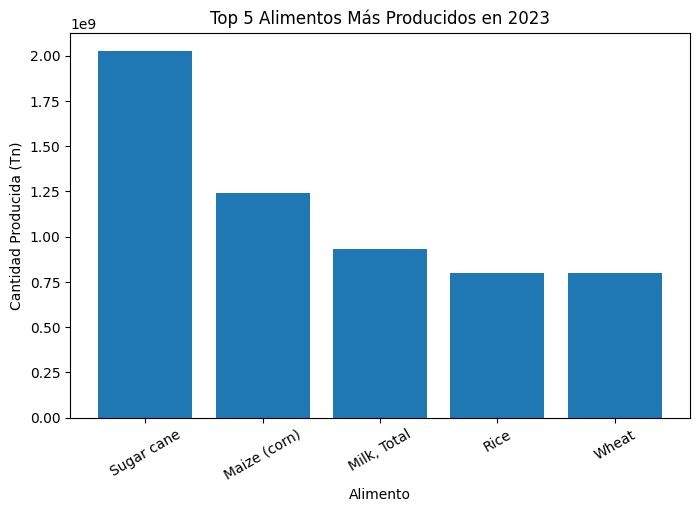

In [88]:


# Seleccionar los 3 alimentos más producidos
top_3_alimentos = df_filtrado_2023_cat.groupby("Item")["Value"].sum().nlargest(5).reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(top_3_alimentos["Item"], top_3_alimentos["Value"])
plt.xlabel("Alimento")
plt.ylabel("Cantidad Producida (Tn)")
plt.title("Top 5 Alimentos Más Producidos en 2023")
plt.xticks(rotation=30)
plt.show()


podemos ver que es la caña de azucar (si lo consideramos como alimento)

## respuesta a la 2da pregunta: cual son los top 10 paises que lideraron la prduccion de ese alimento?

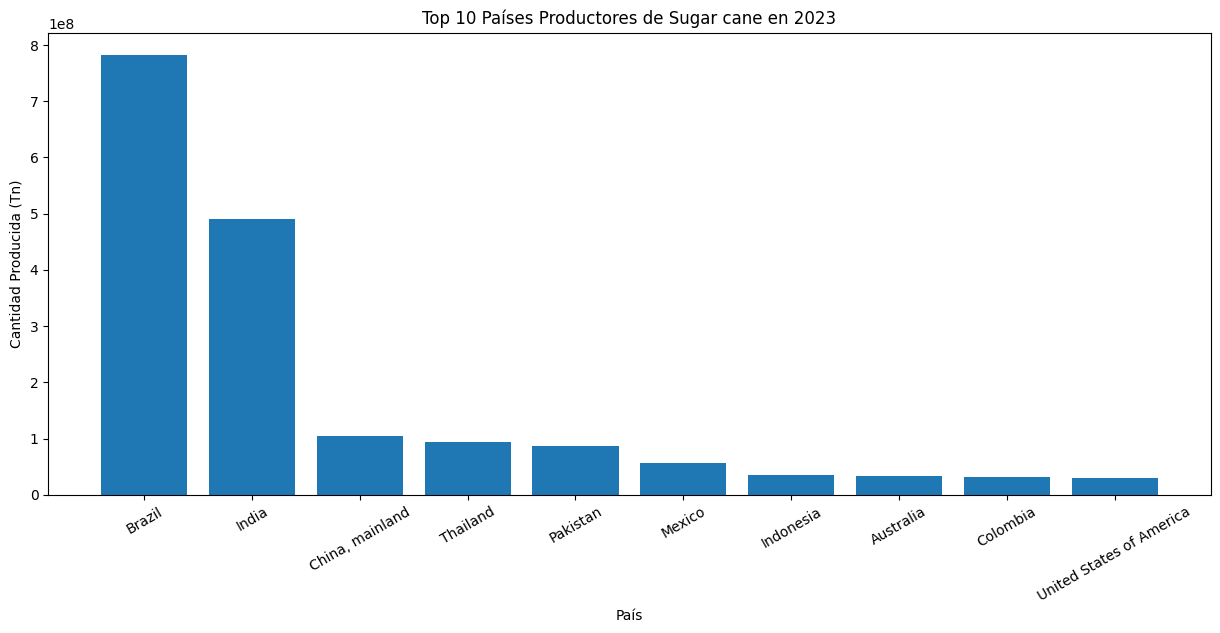

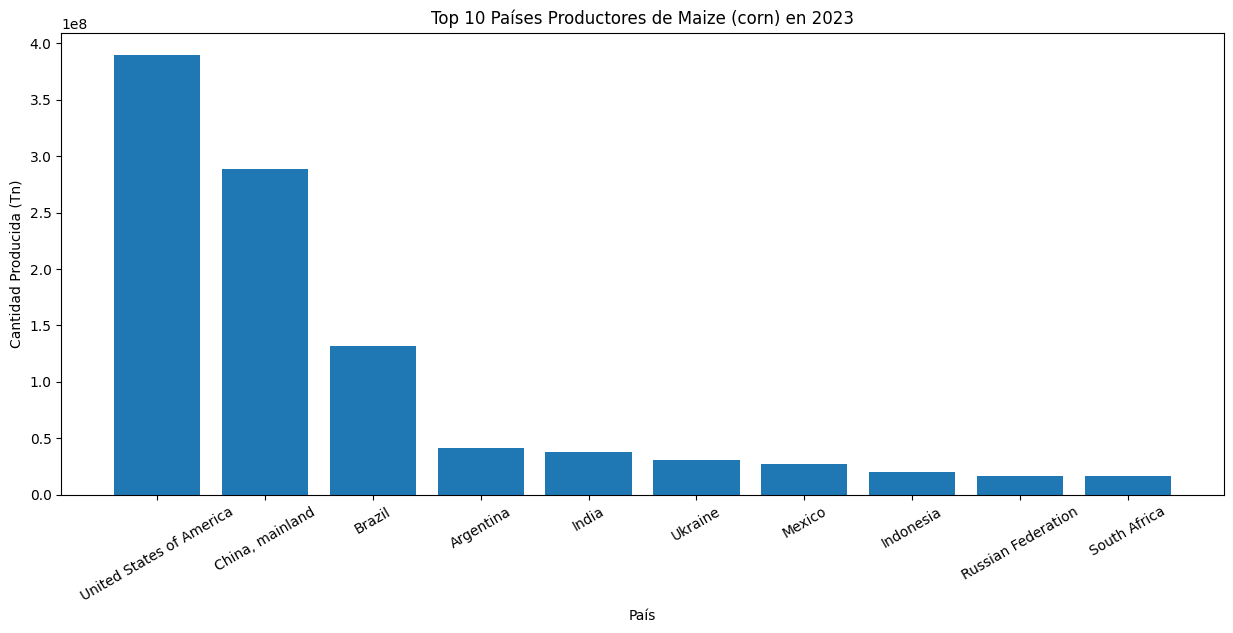

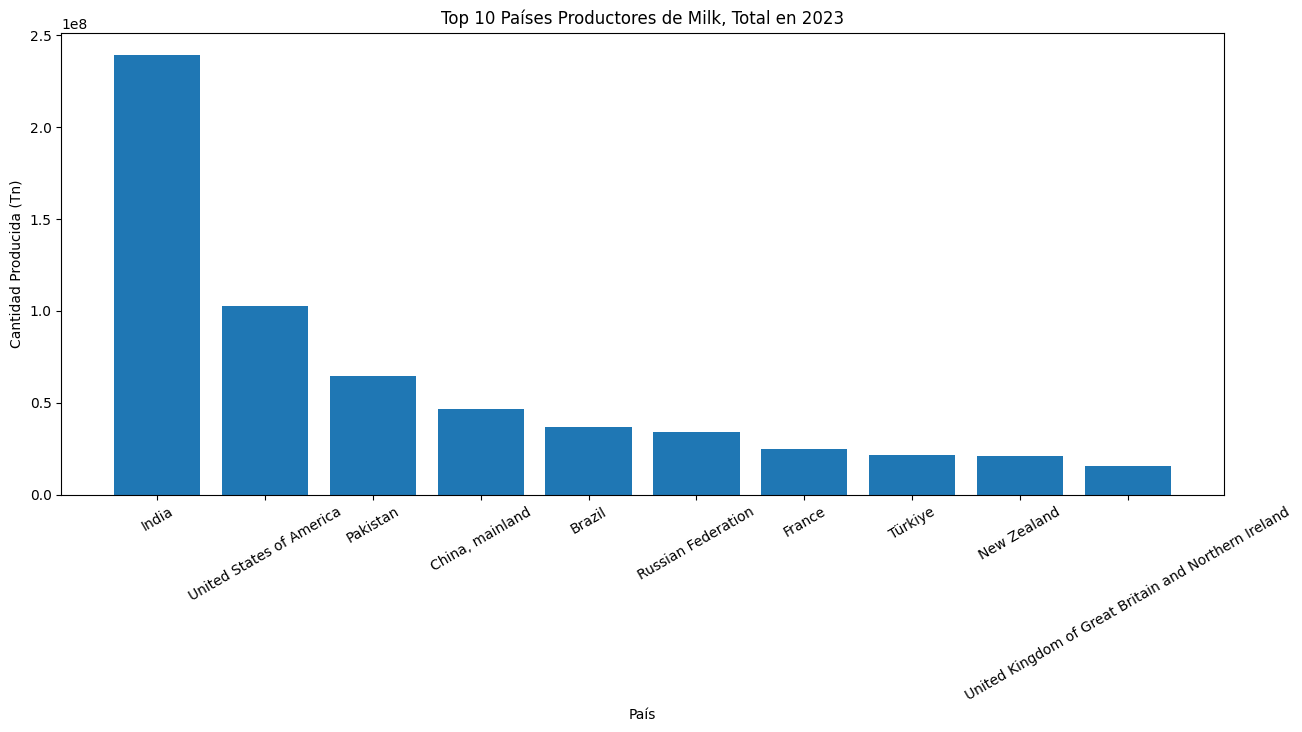

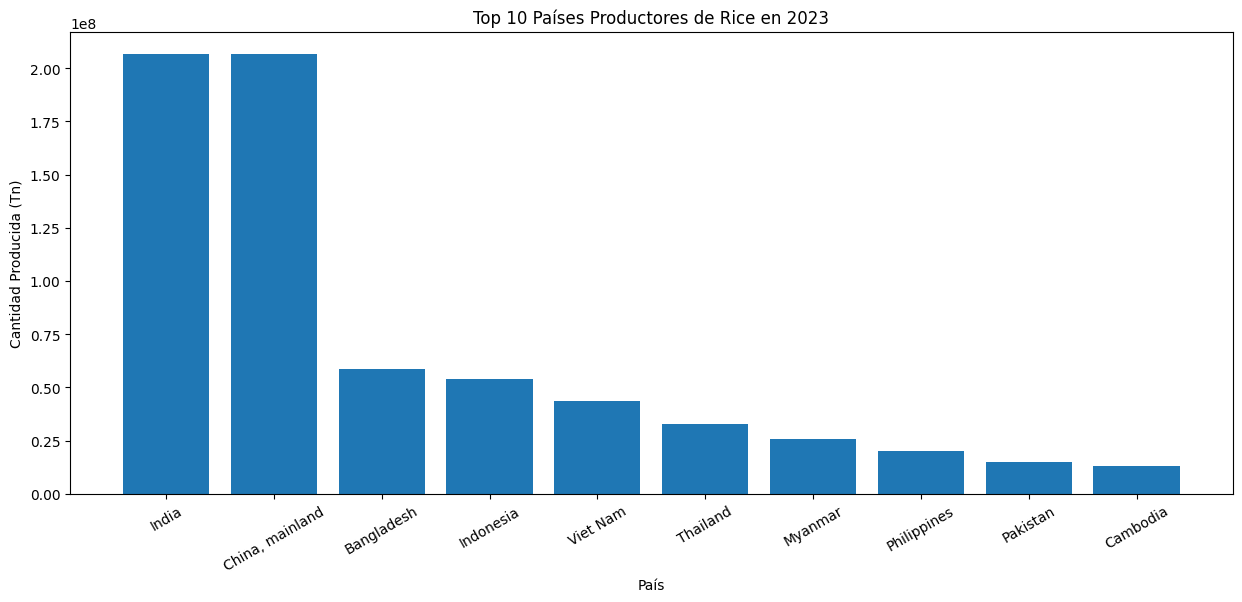

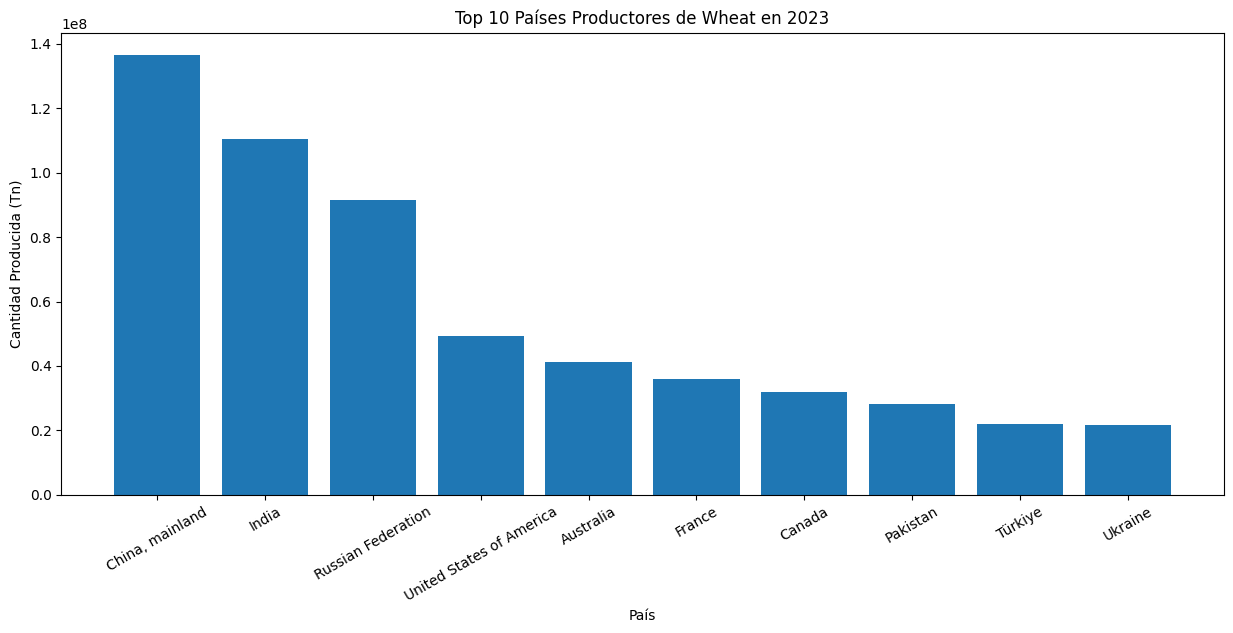

In [87]:
# Iterar sobre los 3 alimentos más producidos y graficar los 3 principales productores de cada uno
for alimento in top_3_alimentos["Item"]:
    # Filtrar el dataframe por ese alimento
    df_top_paises = df_filtrado_2023_cat[df_filtrado_2023_cat["Item"] == alimento]

    # Obtener los 3 países que más producen este alimento
    top_3_paises = df_top_paises.groupby("Area")["Value"].sum().nlargest(10).reset_index()

    # Crear el gráfico de barras
    plt.figure(figsize=(15, 6))
    plt.bar(top_3_paises["Area"], top_3_paises["Value"])
    plt.xlabel("País")
    plt.ylabel("Cantidad Producida (Tn)")
    plt.title(f"Top 10 Países Productores de {alimento} en 2023")
    plt.xticks(rotation=30)
    plt.show()


# respiesta a 3er pregunta. cuantas has destinaron a ese cultivo?

In [72]:
# Filtrar solo los datos de producción (Element = "area harvested")
df_area_harvested = df_paises[df_paises["Element"] == "Area harvested"]
np.shape(df_area_harvested)

(650127, 7)

In [ ]:
df_area_harvested

In [75]:
# Filtrar por año 2023 y por el producto "Sugar cane"
df_sugar_cane_2023 = df_area_harvested[
    (df_area_harvested["Year"] == 2023) & 
    (df_area_harvested["Item"] == "Sugar cane")
]

# Lista de países de interés
paises_interes = [
    "Brazil", "India", "China, mainland", "Thailand", "Pakistan",
    "Mexico", "Indonesia", "Australia", "Colombia", "United States of America"
]

# Filtrar solo los datos de estos países
df_sugar_cane_2023_paises = df_sugar_cane_2023[df_sugar_cane_2023["Area"].isin(paises_interes)]

# Mostrar la cantidad de registros filtrados y las primeras filas
print(f"Cantidad de registros después del filtrado: {df_sugar_cane_2023_paises.shape}")
df_sugar_cane_2023_paises.head(5)

# Opcional: Guardar el resultado en un nuevo CSV
df_sugar_cane_2023_paises.to_csv("sugar_cane_area_harvested_2023.csv", index=False)


Cantidad de registros después del filtrado: (10, 7)


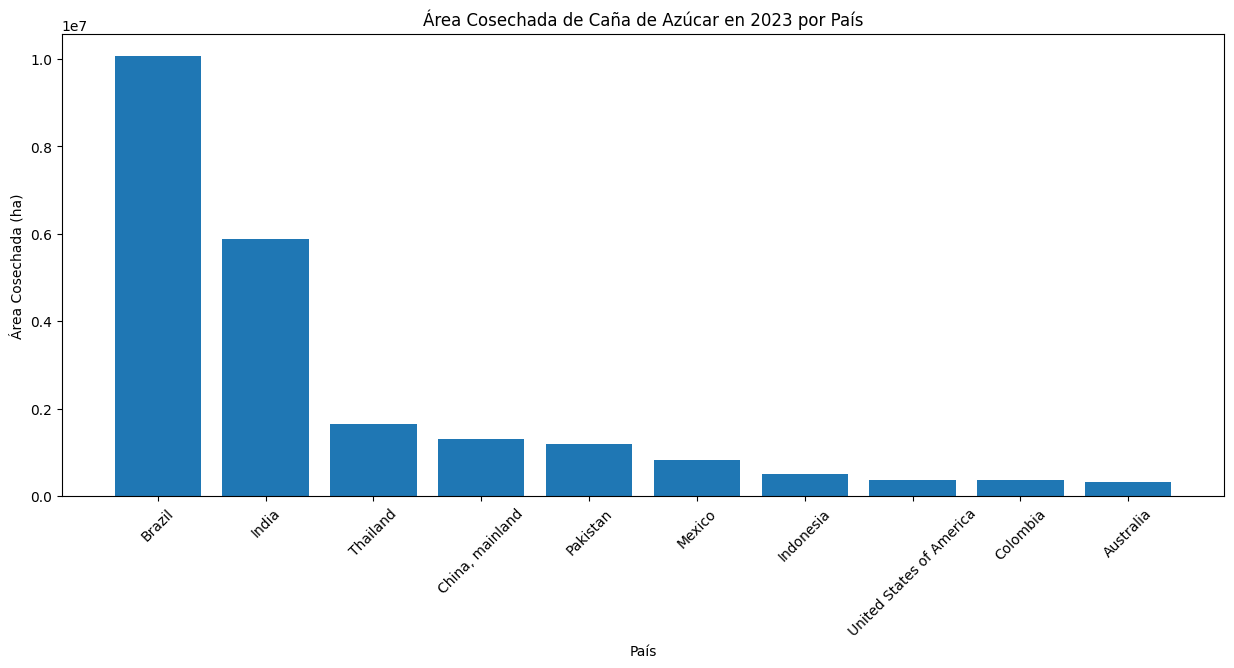

In [86]:



# Verificar que el dataframe no esté vacío
if not df_sugar_cane_2023_paises.empty:
    # Ordenar los países por área cosechada en orden descendente
    df_sugar_cane_2023_paises = df_sugar_cane_2023_paises.sort_values(by="Value", ascending=False)

    # Crear el gráfico de barras
    plt.figure(figsize=(15, 6))
    plt.bar(df_sugar_cane_2023_paises["Area"], df_sugar_cane_2023_paises["Value"])
    plt.xlabel("País")
    plt.ylabel("Área Cosechada (ha)")
    plt.title("Área Cosechada de Caña de Azúcar en 2023 por País")
    plt.xticks(rotation=45)  # Rotar los nombres de los países para mejor visualización

    # Mostrar el gráfico
    plt.show()
else:
    print("No hay datos disponibles para graficar.")



## otros analisis

In [31]:
# Agrupar por país y sumar la producción total, ignorando valores nulos
top_producers = df_filtrado_2023.groupby("Area")["Value"].sum().reset_index()

# Ordenar de mayor a menor producción
top_producers = top_producers.sort_values(by="Value", ascending=False)

# Seleccionar los 10 países con mayor producción
top_10_producers = top_producers.head(10)

# Mostrar el ranking original
print("Ranking original de producción:")
print(top_10_producers)


Ranking original de producción:
                         Area         Value
37            China, mainland  4.234356e+09
82                      India  3.132779e+09
22                     Brazil  2.558663e+09
190  United States of America  1.817637e+09
83                  Indonesia  7.018618e+08
148        Russian Federation  6.249927e+08
134                  Pakistan  4.943570e+08
129                   Nigeria  4.499870e+08
175                  Thailand  3.984972e+08
114                    Mexico  3.512018e+08


In [60]:
# Sumar la producción de Palestina
palestine_production = df_production[df_production["Area"] == "Palestine"]["Value"].sum()

# Producción del 10° país en el ranking
tenth_place_production = top_10_producers.iloc[-1]["Value"]

# Comparación de Palestina con el 10° país del ranking
print(f"Producción total de Palestina: {palestine_production}")
print(f"Producción del 10° país en el ranking: {tenth_place_production}")


Producción total de Palestina: 92925490.48
Producción del 10° país en el ranking: 110093603804.72


In [61]:
# Contar cuántos valores nulos tiene Palestina en producción
palestine_nulls = df_production[(df_production["Area"] == "Palestine") & (df_production["Value"].isnull())].shape[0]

# Estimar impacto si esos valores fueran datos reales
print(f"Palestina tiene {palestine_nulls} valores nulos en producción.")

# Si Palestina tiene valores nulos y su producción es cercana a la del 10° país en el ranking, podría afectar la clasificación.
if palestine_production + palestine_nulls > tenth_place_production:
    print("Palestina podría entrar en el ranking si sus valores nulos contienen datos de alta producción.")
else:
    print("Es poco probable que Palestina afecte el ranking, a menos que sus valores nulos sean significativos.")


Palestina tiene 3142 valores nulos en producción.
Es poco probable que Palestina afecte el ranking, a menos que sus valores nulos sean significativos.


In [26]:
top_foods = df_filtrado_alimentos.groupby("Item")["Value"].sum().nlargest(10)  # Seleccionamos 6 para compensar la eliminación
print(top_foods)

Item
Sugar cane                  7.202834e+10
Hen eggs in shell, fresh    5.105906e+10
Maize (corn)                3.665757e+10
Milk, Total                 3.271601e+10
Rice                        3.256199e+10
Wheat                       3.049585e+10
Potatoes                    1.635693e+10
Sugar beet                  1.314942e+10
Meat, Total                 1.204979e+10
Cassava, fresh              1.101127e+10
Name: Value, dtype: float64


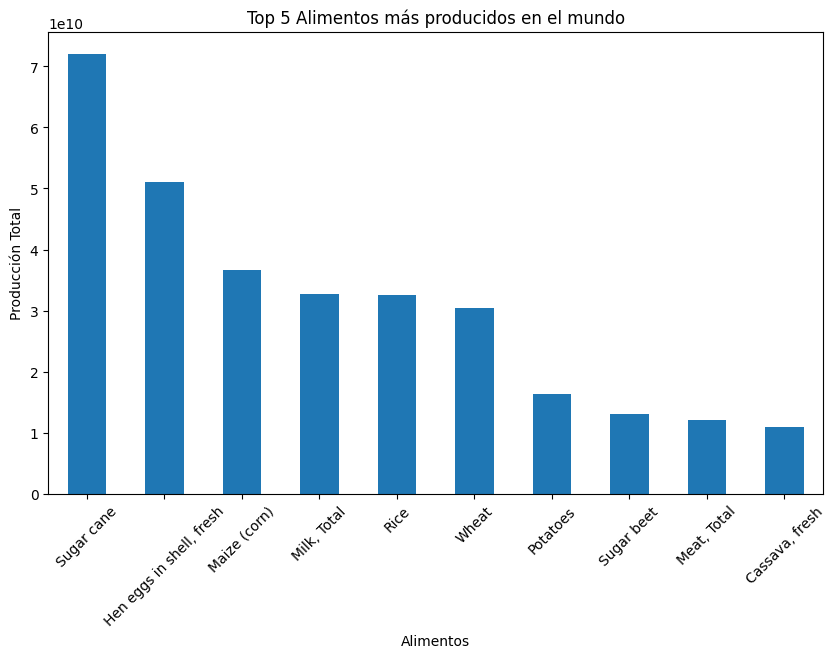

In [27]:
# Gráfico de los 5 alimentos más producidos
plt.figure(figsize=(10, 6))
top_foods.plot(kind="bar")
plt.xlabel("Alimentos")
plt.ylabel("Producción Total")
plt.title("Top 5 Alimentos más producidos en el mundo")
plt.xticks(rotation=45)
plt.show()

In [103]:
# Agrupar por país y sumar la producción total
top_countries_production = df_production.groupby("Area")["Value"].sum().nlargest(10)
# Mostrar los valores finales filtrados
print(top_countries_production)


Area
World                  9.166918e+11
Asia                   3.915242e+11
Americas               2.460207e+11
Europe                 1.919660e+11
Eastern Asia           1.724970e+11
China                  1.571777e+11
China, mainland        1.548287e+11
Southern Asia          1.274918e+11
European Union (27)    1.126112e+11
South America          1.100936e+11
Name: Value, dtype: float64


In [66]:
print(df[df["Area"].str.contains("China", case=False)])



KeyboardInterrupt: 

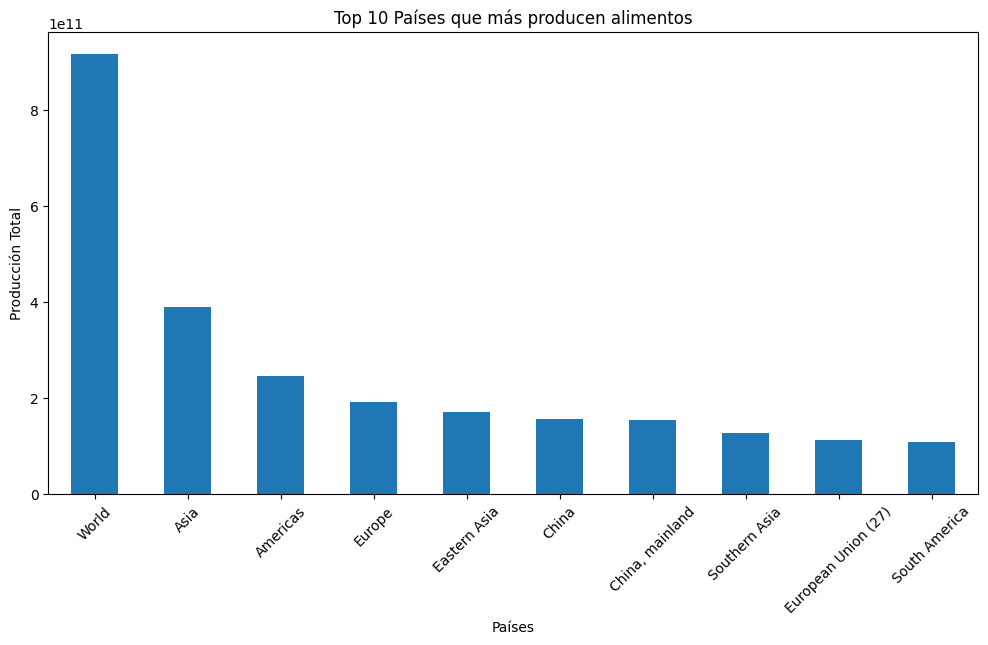

In [ ]:
# Gráfico de los 10 países que más producen
plt.figure(figsize=(12, 6))
top_countries_production.plot(kind="bar")
plt.xlabel("Países")
plt.ylabel("Producción Total")
plt.title("Top 10 Países que más producen alimentos")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Filtrar solo los datos de área cosechada (Element = "Area harvested")
df_area = df_paises[df_paises["Element"] == "Area harvested"]

In [ ]:
# Agrupar por país y sumar el total de hectáreas cultivadas
top_countries_area = df_area.groupby("Area")["Value"].sum().nlargest(10)

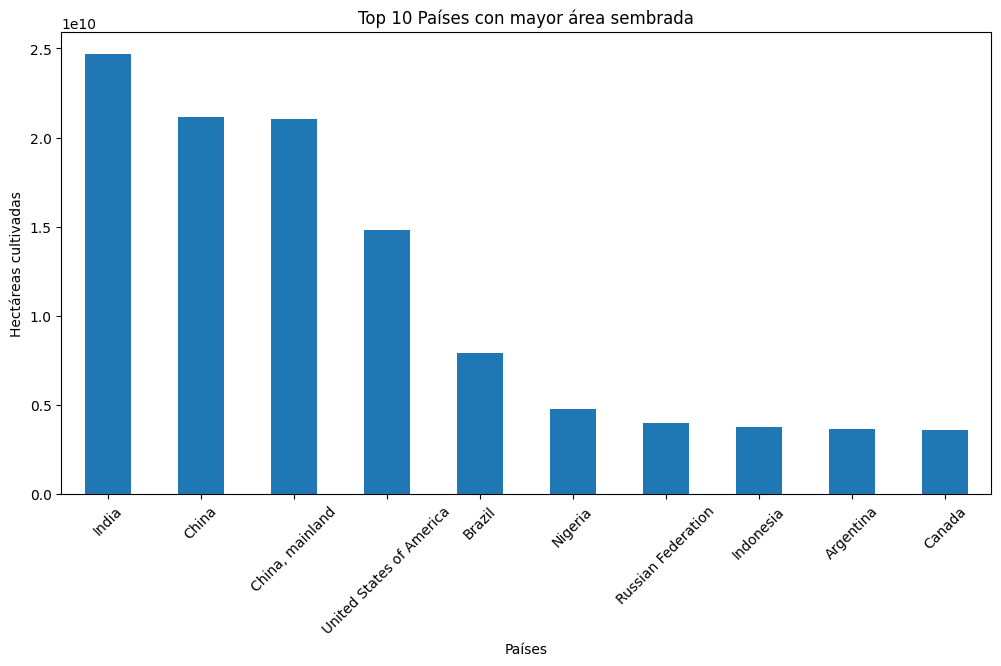

In [ ]:
# Gráfico de los 10 países que más hectáreas dedican al cultivo
plt.figure(figsize=(12, 6))
top_countries_area.plot(kind="bar")
plt.xlabel("Países")
plt.ylabel("Hectáreas cultivadas")
plt.title("Top 10 Países con mayor área sembrada")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_nulos = df_production[df_production["Value"].isna()]
df_nulos.head(5)


,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
275,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5510,Production,1961,1961,t,NaN,M,NaN
276,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5510,Production,1962,1962,t,NaN,M,NaN
277,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5510,Production,1963,1963,t,NaN,M,NaN
278,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5510,Production,1964,1964,t,NaN,M,NaN
279,2,'004,Afghanistan,711,'01654,"Anise, badian, coriander, cumin, caraway, fenn...",5510,Production,1965,1965,t,NaN,M,NaN


In [ ]:
df_nulos_2023 = df_nulos[df_nulos["Year"] == 2023]
df_nulos_2023.head()

,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
25210,3,'008,Albania,541,'01349.20,Other stone fruits,5510,Production,2023,2023,t,NaN,M,NaN
28131,3,'008,Albania,27,'0113,Rice,5510,Production,2023,2023,t,NaN,M,NaN
28981,3,'008,Albania,83,'0114,Sorghum,5510,Production,2023,2023,t,NaN,M,NaN
45927,4,'012,Algeria,603,'01319,"Other tropical fruits, n.e.c.",5510,Production,2023,2023,t,NaN,M,NaN
50476,4,'012,Algeria,544,'01354,Strawberries,5510,Production,2023,2023,t,NaN,M,NaN


In [ ]:
df_nulos_2023.to_csv("df_nulos_2023.csv", index=False)

In [ ]:
df_production["Item"].unique()


array(['Almonds, in shell',
       'Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
       'Apples', 'Apricots', 'Barley', 'Butter and ghee of sheep milk',
       'Butter of cow milk', 'Buttermilk, dry',
       'Cantaloupes and other melons', 'Cattle fat, unrendered',
       'Cheese from milk of goats, fresh or processed',
       'Cheese from milk of sheep, fresh or processed',
       'Cotton lint, ginned', 'Cotton seed', 'Cottonseed oil',
       'Edible offal of cattle, fresh, chilled or frozen',
       'Edible offal of goat, fresh, chilled or frozen',
       'Edible offal of sheep, fresh, chilled or frozen',
       'Edible offals of camels and other camelids, fresh, chilled or frozen',
       'Fat of camels', 'Figs', 'Game meat, fresh, chilled or frozen',
       'Goat fat, unrendered', 'Grapes', 'Hen eggs in shell, fresh',
       'Linseed', 'Maize (corn)', 'Meat of camels, fresh or chilled',
       'Meat of cattle with the bone, fresh or chilled',
       '

In [ ]:
# Lista de nombres que representan categorías generales y que deben ser excluidos
categorias_a_excluir_item = [
    "Cereals, primary", "Sugar Crops Primary", "Eggs Primary", "Fruit Primary",
    "Vegetables Primary", "Meat, Total", "Milk, Total", "Roots and Tubers, Total",
    "Oilcrops, Oil Equivalent", "Oilcrops, Cake Equivalent", "Sheep and Goat Meat",
    "Meat, Poultry", "Treenuts, Total", "Pulses, Total", "Citrus Fruit, Total",
    "Fibre Crops, Fibre Equivalent", "Beef and Buffalo Meat, primary",
    "Skim Milk & Buttermilk, Dry"
]

# Filtrar el dataframe eliminando las categorías generales
df_filtrado_alimentosonly = df[~df["Item"].isin(categorias_a_excluir_item)]

# Guardar el nuevo dataset limpio
df_filtrado_alimentosonly.to_csv("datos_filtrados.csv", index=False)

# Mostrar los primeros registros para verificar
df_filtrado_alimentosonly.head()

KeyboardInterrupt: 

In [ ]:
# conteo de filas y columnas
np.shape(df_filtrado_alimentosonly)

(3599906, 14)

In [ ]:
# Filtrar el dataframe para quedarnos solo con registros donde "Element" sea "Production"
df_filtrado_alimentosonly_produccion = df_filtrado_alimentosonly[df_filtrado_alimentosonly["Element"] == "Production"]

# Guardar el nuevo dataset limpio con solo producción
df_filtrado_alimentosonly_produccion.to_csv("datos_produccion.csv", index=False)

# Mostrar los primeros registros para verificar
df_filtrado_alimentosonly_produccion.head()


,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
111,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5510,Production,1961,1961,t,0.0,A,NaN
112,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5510,Production,1962,1962,t,0.0,A,NaN
113,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5510,Production,1963,1963,t,0.0,A,NaN
114,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5510,Production,1964,1964,t,0.0,A,NaN
115,2,'004,Afghanistan,221,'01371,"Almonds, in shell",5510,Production,1965,1965,t,0.0,A,NaN


In [104]:
df_production["Area"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
      

In [105]:
#printeamos un listado con los valores de la culumna Area, para ver si solo incluye paises:

pd.set_option("display.max_rows", None)  # Muestra todas las filas, sin truncar
df_production["Area"].value_counts() # me enlista las categorias dentro de la columna "area"

Area
World                                                   17509
Asia                                                    16453
Net Food Importing Developing Countries                 16191
Africa                                                  15522
Americas                                                15446
Low Income Food Deficit Countries                       15250
Land Locked Developing Countries                        14772
Eastern Asia                                            14314
Europe                                                  14175
Least Developed Countries                               14147
South America                                           14143
China                                                   13836
European Union (27)                                     13804
Western Asia                                            13711
Southern Europe                                         13640
China, mainland                                         13511
Sou